# Part I - Prosper Loan Data Exploration
## by Jonathan Ravel

## Introduction
> The Prosper Loan Dataset contains a wide variety of information pertaining to Prosper's main product of personal loans; information is from 2005 to 2014. 

## Preliminary Wrangling
> Since there was such a variety of data, the first phase of exploration examined different fields of interest. 

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
df = pd.read_csv("prosperLoanData.csv")

In [4]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,8/14/2009 0:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,12/17/2009 0:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure of your dataset?

> The data includes 81 fields of a wide variety of information.

### What is/are the main feature(s) of interest in your dataset?

> The main features are information pertaining to the Prosper personal loans and a different credit related information on the borrowers. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I'm interested in Prosper's growth overall, the rates the borrowers were paying and what factors may have contributed to those rates.

## Univariate Exploration

> This is quite a lot of data! First steps will be an exploration to find what is most important. 


I was interested to see loans by year.

In [6]:
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])
df['Year'] = pd.DatetimeIndex(df['LoanOriginationDate']).year

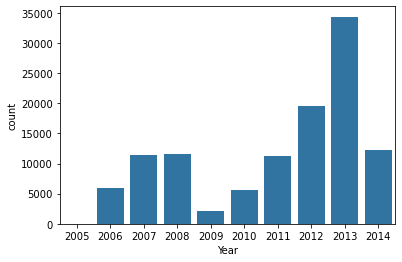

In [7]:
basic_blue = (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
sb.countplot(data = df, x = 'Year', color = basic_blue);


It makes sense that 2009, the year after the Great Financial Crisis, conditions may have prevented loan funding.   
Next I wanted to see if 2005 and 2014 contained full years of data or were partial.

In [8]:
df_date_2005 = df[df['LoanOriginationDate'].dt.year == 2005]
df_date_2005_select = df_date_2005[['ListingNumber', 'LoanOriginationDate']]
df_2005 = df_date_2005_select.sort_values(by='LoanOriginationDate')
df_2005.head(5)


,ListingNumber,LoanOriginationDate
113921,4,2005-11-15
62297,7,2005-11-18
73945,18,2005-11-22
78414,22,2005-11-22
25166,6,2005-11-23


This loan data may be valid, but for any data grouped by year it should be removed as not representative. 

In [9]:
df_date_2014 = df[df['LoanOriginationDate'].dt.year == 2014]
df_date_2014_select = df_date_2014[["ListingNumber", "LoanOriginationDate"]]
df_2014 = df_date_2014_select.sort_values(by='LoanOriginationDate')
df_2014.tail()


,ListingNumber,LoanOriginationDate
46829,1239416,2014-03-12
37563,1113064,2014-03-12
91556,1017064,2014-03-12
5972,1241312,2014-03-12
18444,1236461,2014-03-12


Similarly, 2014 is not a whole year and while the individual loan data is valid, the year totals are not.  
For the growth of Prosper loans by year, I selected 2016-2013.

In [10]:
df_fullyears = df[ (df['Year'] >= 2006) & (df['Year'] <= 2013)]

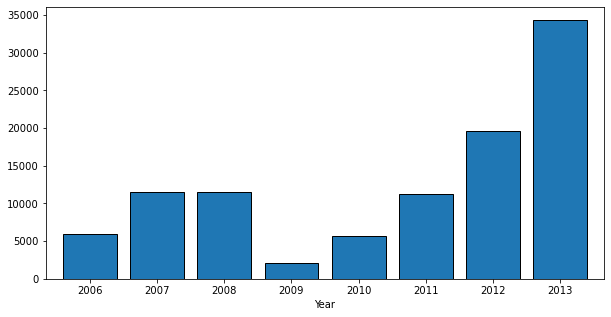

In [11]:
df_fullyears.groupby(["Year"])["Year"].count().plot.bar(edgecolor='black', figsize=[10, 5],rot=0,width=0.8);

> Though loans dropped in 2009, Prosper enjoyed very strong growth from 2010 to 2013 with total loan funding growing from just over 5000 loans to 35000 in those 4 years. 

Next I wanted to look more into the data on the loans, starting with the loan origination amount.  How much were people borrowing?

In [12]:
df["LoanOriginalAmount"].describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

From 2005 to 2014, Prosper made almost 114000 loans with a mean size of 8337, a minimum of 1000 and maximum of 35000. 

What was the distribution of the loan amounts?

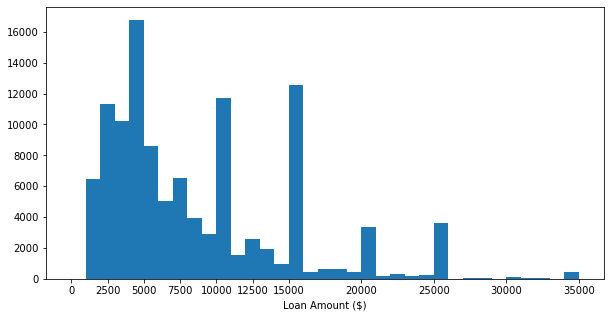

In [13]:
binsize = 1000
bins = np.arange(0, df['LoanOriginalAmount'].max()+binsize, binsize)
ticks = [0, 2500, 5000, 7500, 10000, 12500, 15000, 20000, 25000, 30000, 35000]

plt.figure(figsize=[10, 5])
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins)

plt.xlabel('Loan Amount ($)')
plt.xticks(ticks)
plt.show()

Though many of the loans fall between 2500-7500, there are jumps on the round number levels of 10000, 15000, 20000 and 25000.  
Loans greater than 25000 were rare but not sure they should be removed as outliers; it is simply right-skewed data. 

Next I wanted to look at the term of the loans. Only a small number were 12 months, with the majority being 36 months. 

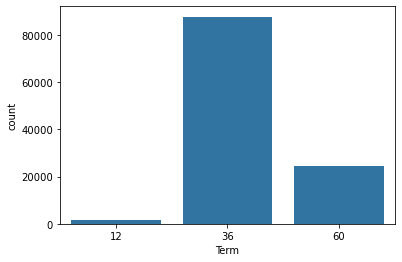

In [14]:
sb.countplot(data = df, x = 'Term', color = basic_blue);

What rates were these borrowers paying? 

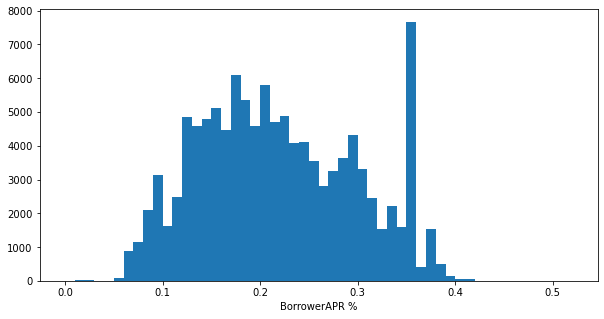

In [15]:
binsize = .01
bins = np.arange(0, df['BorrowerAPR'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df, x = ('BorrowerAPR'), bins = bins)

plt.xlabel('BorrowerAPR %')
plt.show()

The majority were paying rates of 10% up to 30%, with some paying between 30-40%. Others were paying less than 10%.  
This is quite a wide spread in rates. In addition, the highest bin value near 35% needs investigation.

How much were the investors receiving in return? 

In [16]:
df['EstimatedReturn'].describe()

count    84853.000000
mean         0.096068
std          0.030403
min         -0.182700
25%          0.074080
50%          0.091700
75%          0.116600
max          0.283700
Name: EstimatedReturn, dtype: float64

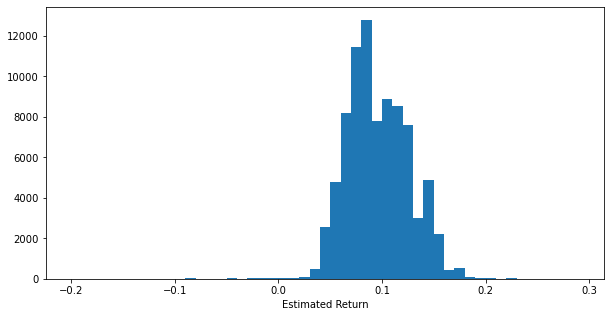

In [17]:
binsize = .01
bins = np.arange(-.2, df['EstimatedReturn'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df, x = ('EstimatedReturn'), bins = bins)

plt.xlabel('Estimated Return')
plt.show()

Although there were wide outliers, returns near 10% are still quite good.  
The question here is whether here is how well the Estimated Return matched the Actual Return, which is not included. 

Let's remove the outliers for a closer look at Estimated Returns. 

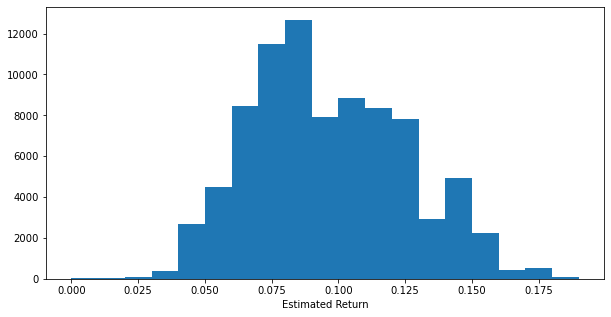

In [18]:
binsize = .01
bins = np.arange(0, .2, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df, x = ('EstimatedReturn'), bins = bins)

plt.xlabel('Estimated Return')
plt.show()

Here we see Estimated Returns to be closer to 8-9%.

What were the Prosper ratings about? 

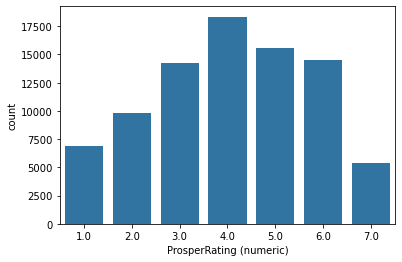

In [19]:
sb.countplot(data = df, x = 'ProsperRating (numeric)', color = basic_blue);

In [20]:
# Were these the same ratings as the Alpha system?
df_rating1 = df['ProsperRating (numeric)'].value_counts()
df_rating1

4.0    18345
5.0    15581
6.0    14551
3.0    14274
2.0     9795
1.0     6935
7.0     5372
Name: ProsperRating (numeric), dtype: int64

In [21]:
df_rating2 = df['ProsperRating (Alpha)'].value_counts()
df_rating2

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

These appear to be different labeling systems for the same information.  
I'll use the numeric scale from here, and rename the column to be cleaner. 

In [22]:
df = df.rename(columns = {'ProsperRating (numeric)' : 'ProsperRating_n'})

How does the Prosper Rating compare to the Prosper Score?

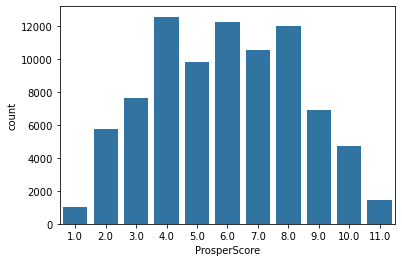

In [23]:
sb.countplot(data = df, x = 'ProsperScore', color = basic_blue);

At this point it is hard to tell how the Score differs from the Rating. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

* Prosper grew very rapidly from 2010 to 2013; 2005 and 2014 needed to be removed as partial years.
* Most borrowers were obtaining loans under 10000, though 15000, 20000, and 25000 were also common. 
* The annual percentage rate, or APR, these borrowers were paying ranged from under 10% to over 40%. This is of particular interest going forward.
* Estimated Returns have outliers - the data was easier to see with these removed.
* Though the Prosper numeric and alpha ratings were idential, the Prosper Score seems different. At this point we do not know why.



## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In this section I wanted to investigate more on the type of loans being made and their trends. 
Were the size of the loans increasing over time?

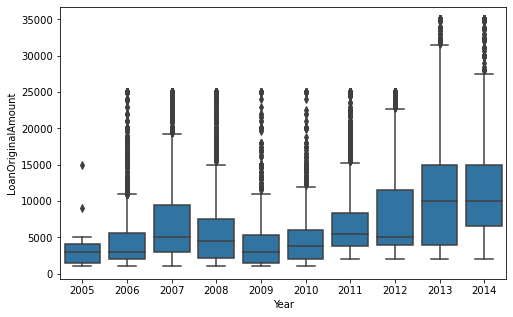

In [24]:
plt.figure(figsize = [8, 5])
sb.boxplot(data=df, x='Year', y ='LoanOriginalAmount', color = basic_blue);

This chart is quite revealing. The median of the interquartile range more than doubled from 2009 to 2013, from well under 5000 to over 10000. 

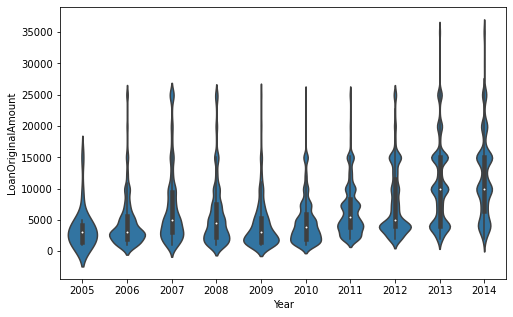

In [25]:
plt.figure(figsize = [8, 5])
sb.violinplot(data=df, x='Year', y ='LoanOriginalAmount', color = basic_blue);

The violin plot shows the higher loan amounts over time, as well as the cluster of sizes at the round number levels of 10000, 15000, 20000, and 25000 that were made in 2013 and 2014.


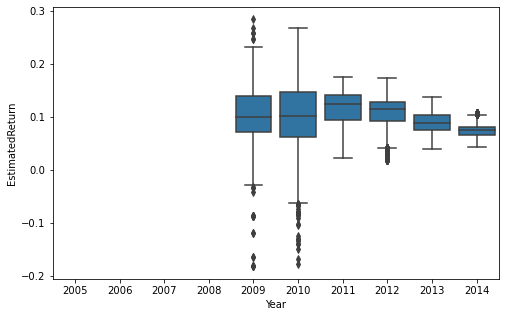

In [26]:
plt.figure(figsize = [8, 5])
sb.boxplot(data=df, x='Year', y ='EstimatedReturn', color = basic_blue);

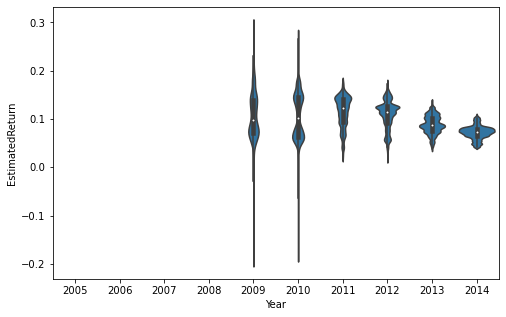

In [27]:
plt.figure(figsize = [8, 5])
sb.violinplot(data=df, x='Year', y ='EstimatedReturn', color = basic_blue);

Prosper seemed more confident in its estimates of return as years went on, with fewer outliers and tighter spread. 

What was the difference in the credit scores?

In [28]:
df['CreditScoreRangeLower'].describe()

count    113346.000000
mean        685.567731
std          66.458275
min           0.000000
25%         660.000000
50%         680.000000
75%         720.000000
max         880.000000
Name: CreditScoreRangeLower, dtype: float64

In [29]:
df['CreditScoreRangeUpper'].describe()

count    113346.000000
mean        704.567731
std          66.458275
min          19.000000
25%         679.000000
50%         699.000000
75%         739.000000
max         899.000000
Name: CreditScoreRangeUpper, dtype: float64

How did credit score impact the BorrowerAPR? 

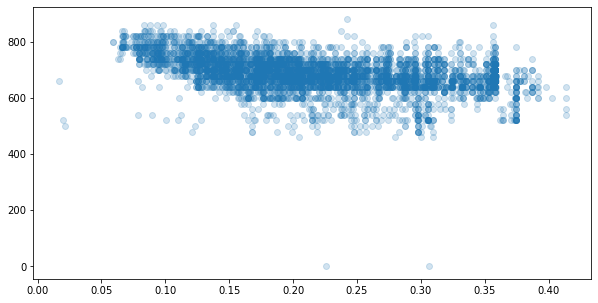

In [30]:
# plot matrix: sample 5000
plt.figure(figsize = [10, 5])
df_samp = df.sample(n=5000, replace = False)
plt.scatter(data = df_samp, x = 'BorrowerAPR', y = 'CreditScoreRangeLower', alpha = 1/5);


Though there seems to be some inverse correlation, it is less clear than I would have thought. 

In [31]:
# Checking for null values on the Credit Score data:
df['CreditScoreRangeLower'].isna().sum()

591

In [32]:
df=df.dropna(subset=['CreditScoreRangeLower'])

In [33]:
df['CreditScoreRangeLower'].isna().sum()

0

In [34]:
df['CreditScoreRangeUpper'].isna().sum()

0

In [35]:
df=df.dropna(subset=['CreditScoreRangeUpper'])

In [36]:
df['CreditScoreRangeUpper'].isna().sum()

0

Now let's look at other factors to see if they impact the Borrower APR.

What about loan term? 

In [37]:
df['Term'].value_counts()

36    87187
60    24545
12     1614
Name: Term, dtype: int64

In [38]:
# Since 12 months was an outlier, let's remove it. 
df_term = df[df.Term != 12]

In [39]:
df_term['Term'].value_counts()

36    87187
60    24545
Name: Term, dtype: int64

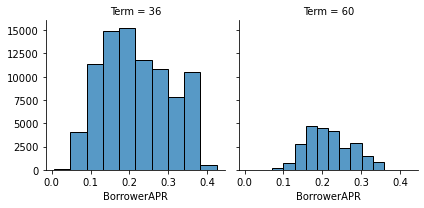

In [40]:

g = sb.FacetGrid(df_term, col = 'Term')
g = g.map(sb.histplot, 'BorrowerAPR', bins = 10)


The terms of 36 and 60 months have somewhat similar distributions so this doesn't appear to be a huge factor. 

Does Employment Status give us information?

In [41]:
df['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5345
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

Since most are "Employed" or "Full-time", this doesn't appear to give significant information.

How about Employment Status Duration? 

In [42]:
df['EmploymentStatusDuration'].describe()

count    106312.000000
mean         96.071582
std          94.480605
min           0.000000
25%          26.000000
50%          67.000000
75%         137.000000
max         755.000000
Name: EmploymentStatusDuration, dtype: float64

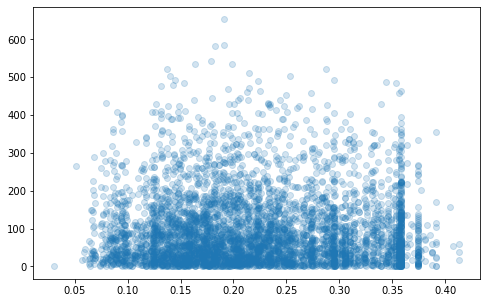

In [43]:
plt.figure(figsize = [8, 5])
df_samp = df.sample(n=5000, replace = False)
plt.scatter(data = df_samp, x = 'BorrowerAPR', y = 'EmploymentStatusDuration', alpha = 1/5);

It is hard to draw many conclusions from this plot. We may have to segment the data. 

Debt to Income Ratio would seem to have a connection to the Borrower APR - what does the data show?

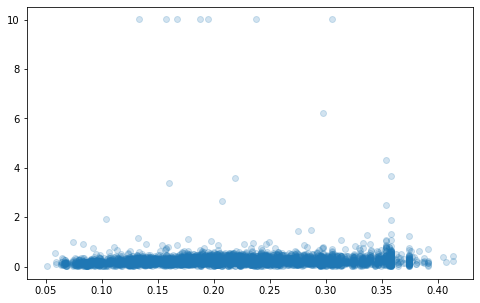

In [44]:
plt.figure(figsize = [8, 5])
plt.scatter(data = df_samp, x = 'BorrowerAPR', y = 'DebtToIncomeRatio', alpha = 1/5);

Again this is hard to draw any immediate conclusion here.

I'm interested in segmenting the data by the Prosper Rating. 

In [45]:
df['ProsperRating_n'].value_counts()

4.0    18345
5.0    15581
6.0    14551
3.0    14274
2.0     9795
1.0     6935
7.0     5372
Name: ProsperRating_n, dtype: int64

In [46]:
df_1 = df [ (df['ProsperRating_n'] == 1)]
df_2 = df [ (df['ProsperRating_n'] == 2)]
df_3 = df [ (df['ProsperRating_n'] == 3)]
df_4 = df [ (df['ProsperRating_n'] == 4)]
df_5 = df [ (df['ProsperRating_n'] == 5)]
df_6 = df [ (df['ProsperRating_n'] == 6)]
df_7 = df [ (df['ProsperRating_n'] == 7)]

In [47]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6935 entries, 15 to 113920
Data columns (total 82 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   ListingKey                           6935 non-null   object        
 1   ListingNumber                        6935 non-null   int64         
 2   ListingCreationDate                  6935 non-null   object        
 3   CreditGrade                          0 non-null      object        
 4   Term                                 6935 non-null   int64         
 5   LoanStatus                           6935 non-null   object        
 6   ClosedDate                           3725 non-null   object        
 7   BorrowerAPR                          6935 non-null   float64       
 8   BorrowerRate                         6935 non-null   float64       
 9   LenderYield                          6935 non-null   float64       
 10  Estimated

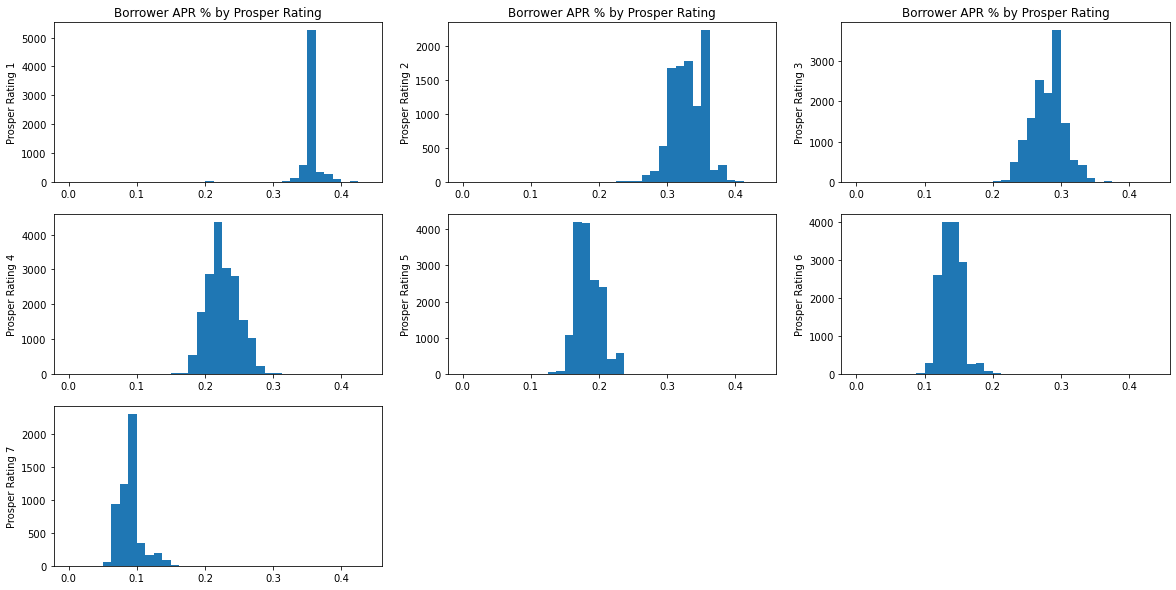

In [48]:
plt.figure(figsize = [20, 10]) 
bins = np.arange(0,.4+.05, .0125)

plt.subplot(3, 3, 1) 
plt.hist(data = df_1, x = 'BorrowerAPR', bins = bins)
plt.title('Borrower APR % by Prosper Rating')
plt.ylabel('Prosper Rating 1')

plt.subplot(3, 3, 2) 
plt.title('Borrower APR % by Prosper Rating')
plt.hist(data = df_2, x = 'BorrowerAPR', bins = bins)
plt.ylabel('Prosper Rating 2');

plt.subplot(3, 3, 3) 
plt.title('Borrower APR % by Prosper Rating')
plt.hist(data = df_3, x = 'BorrowerAPR', bins = bins)
plt.ylabel('Prosper Rating 3');

plt.subplot(3, 3, 4) 
plt.hist(data = df_4, x = 'BorrowerAPR', bins = bins)
plt.ylabel('Prosper Rating 4');

plt.subplot(3, 3, 5) 
plt.hist(data = df_5, x = 'BorrowerAPR', bins = bins)
plt.ylabel('Prosper Rating 5');

plt.subplot(3, 3, 6) 
plt.hist(data = df_6, x = 'BorrowerAPR', bins = bins)
plt.ylabel('Prosper Rating 6');

plt.subplot(3, 3, 7) 
plt.hist(data = df_7, x = 'BorrowerAPR', bins = bins)
plt.ylabel('Prosper Rating 7');


This subplot shows that borrowers had very different rates that corresponded to the Prosper Rating.  
The highest rated borrowers enjoyed rates of under 10%, but the worst borrowers were paying close to 35%.

Here's a heatmap showing the comparison of the Borrower APR to the Credit Rating. 

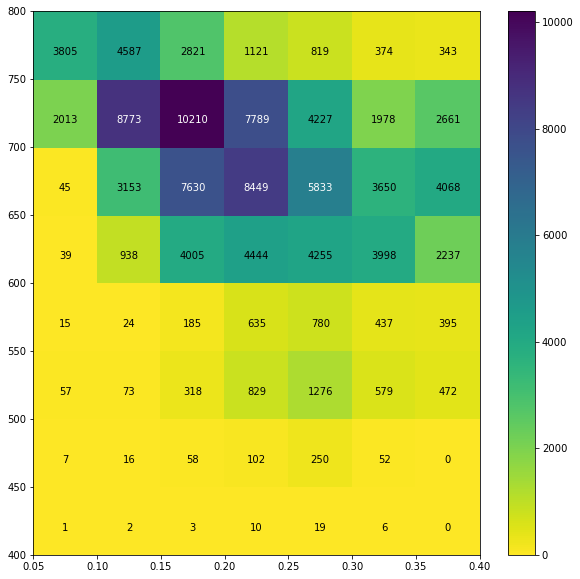

In [49]:
bins_x = np.arange(.05, .4+.05, .05)
bins_y = np.arange(400, 800+50, 50)
plt.figure(figsize = [10, 10])
h2d = plt.hist2d(data = df, x = 'BorrowerAPR', y = 'CreditScoreRangeLower', cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar();

counts = h2d[0]

for i in range(counts.shape[0]):
    for j in range (counts.shape[1]):
        c = counts[i,j]
        if c >= 5000: # increase visibility on darker cells
            plt.text(bins_x[i]+.025, bins_y[j]+20, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c >= 0: # increase visibility on darker cells
            plt.text(bins_x[i]+.025, bins_y[j]+20, int(c),
                     ha = 'center', va = 'center', color = 'black')

This shows the most loans in the darker cluster of 15-25% APR and credit scores from 650-750.

Next I wanted to investigate some of the numeric variables to see if they had any connection to the Borrower APR. 
I took a more detailed look at Borrower APR, Estimated Return, Prosper Rating, Prosper Score, the Credit Score using the lower value, and Debt to Income Ratio.

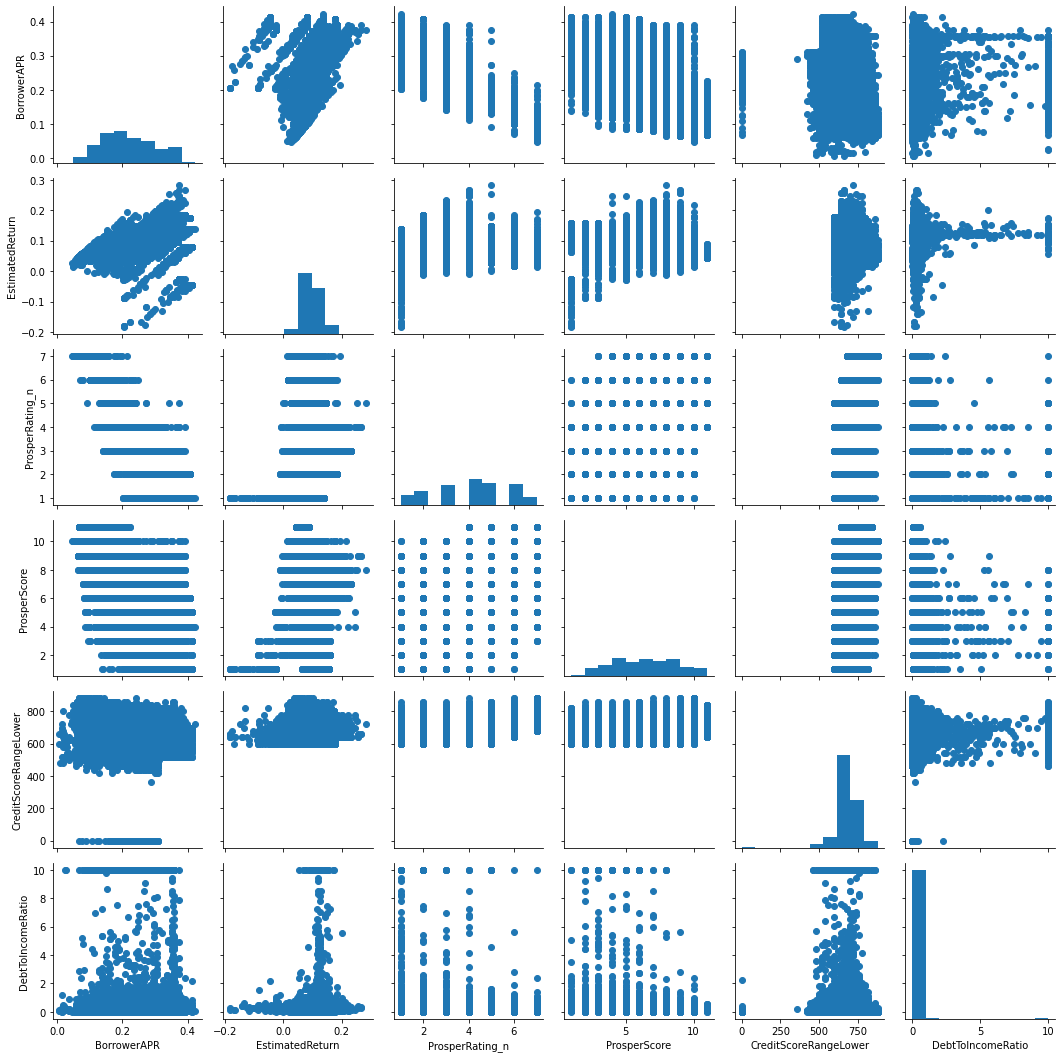

In [50]:
g = sb.PairGrid(data = df, vars = ['BorrowerAPR' , 'EstimatedReturn', 'ProsperRating_n', 'ProsperScore', 'CreditScoreRangeLower', 'DebtToIncomeRatio'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)


I found this harder to interpret. How about a more simple correlation matrix?

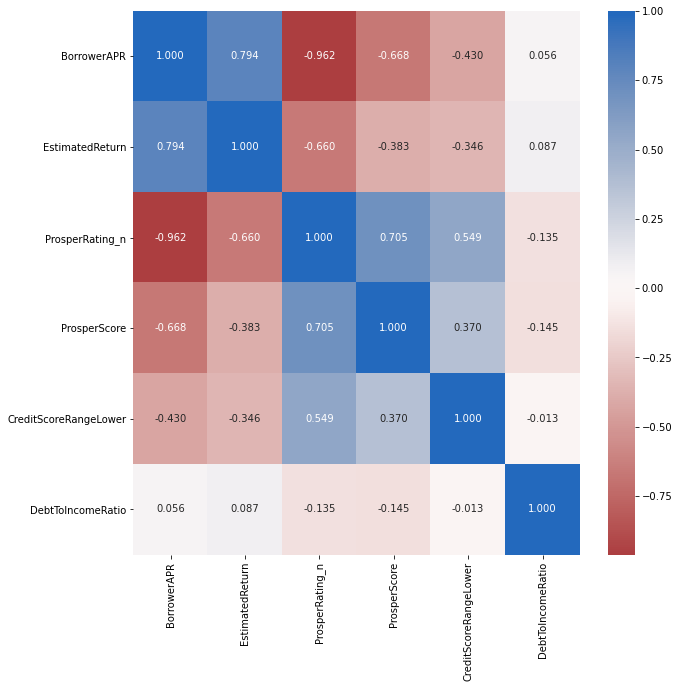

In [51]:
vars = ['BorrowerAPR' , 'EstimatedReturn', 'ProsperRating_n', 'ProsperScore', 'CreditScoreRangeLower', 'DebtToIncomeRatio']
plt.figure(figsize = [10, 10])
sb.heatmap(df[vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.show()

This was more clear. There was a strong negative correlation between the Borrower APR and Prosper Rating, as we already observed. It is not clear why the Prosper Score was different than the Rating. Estimated Return was closely correlated to the Borrower APR, but surprisingly not very correlated to the Prosper Score, Credit Score or Debt to Income Ratio.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> One of the most interesting part is how different the interest rates were for different borrowers. But so far it has been hard to understand why!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The subplot of the Borrower APR by Prosper Rating shows marked differences in these categories of borrowers. But comparing the Borrower APR to other numerical categories did not immediately explain everything - even the usual credit rating was not strongly correlated or inversely correlated. 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [52]:
I was interested to see the correlations of the categories organized by Prosper Score. 

SyntaxError: invalid syntax (<ipython-input-52-da9d38e52aeb>, line 1)

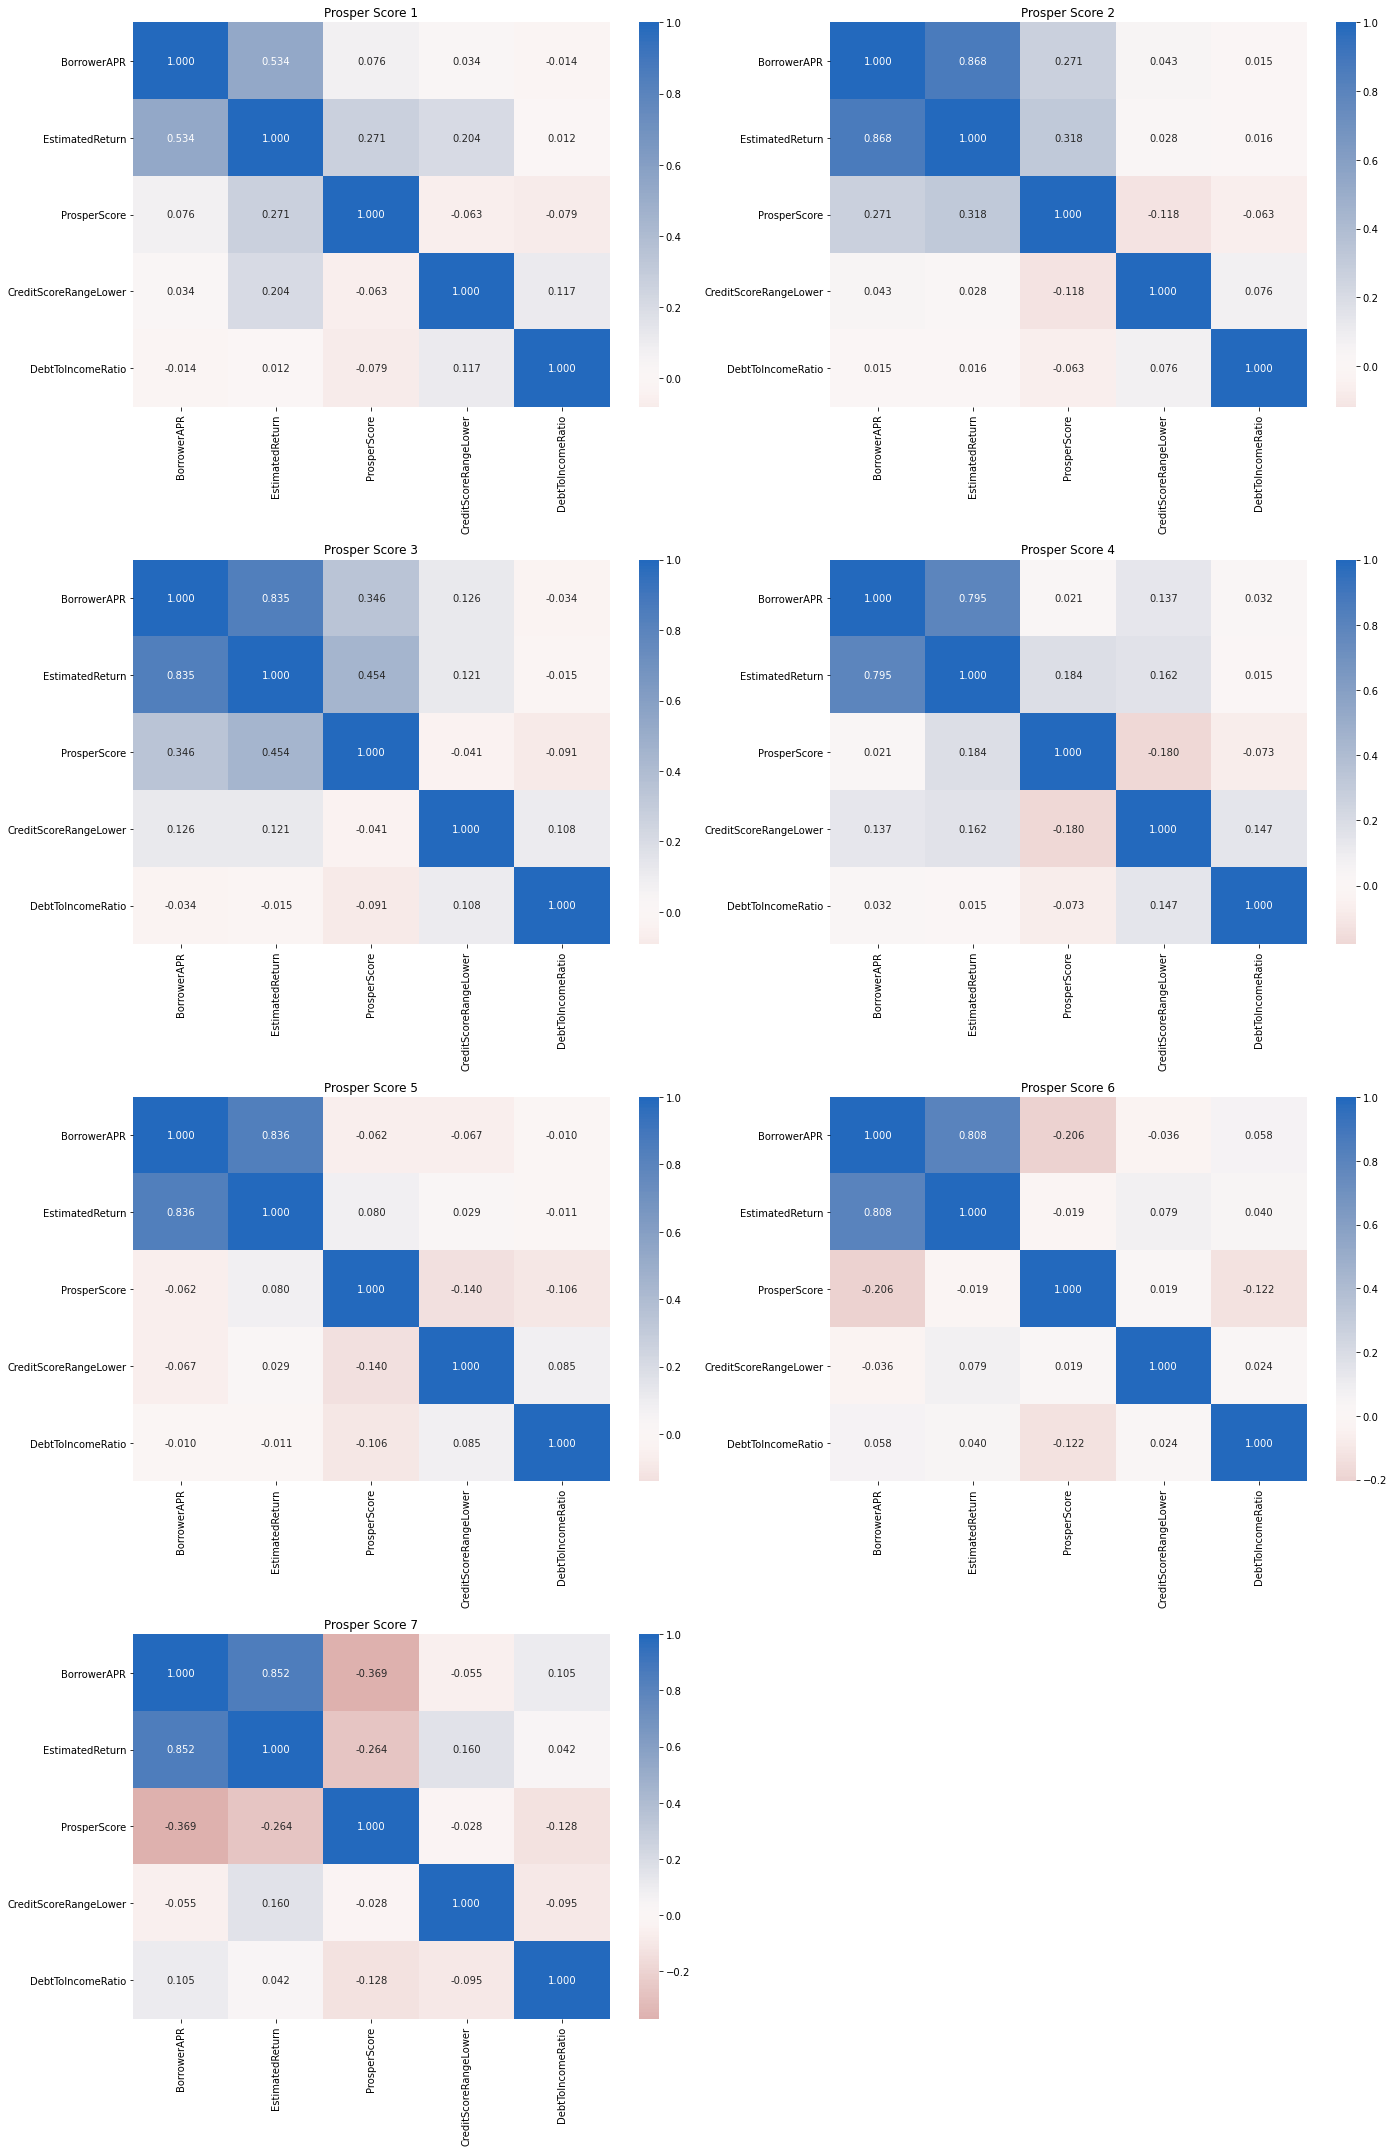

In [53]:
plt.figure(figsize = [20, 30])
vars2 = ['BorrowerAPR' , 'EstimatedReturn', 'ProsperScore', 'CreditScoreRangeLower', 'DebtToIncomeRatio']

plt.subplot(4,2,1)
sb.heatmap(df_1[vars2].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.title('Prosper Score 1')

plt.subplot(4,2,2)
sb.heatmap(df_2[vars2].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.title('Prosper Score 2')

plt.subplot(4,2,3)
sb.heatmap(df_3[vars2].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.title('Prosper Score 3')

plt.subplot(4,2,4)
sb.heatmap(df_4[vars2].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.title('Prosper Score 4')

plt.subplot(4,2,5)
sb.heatmap(df_5[vars2].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.title('Prosper Score 5')

plt.subplot(4,2,6)
sb.heatmap(df_6[vars2].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.title('Prosper Score 6')

plt.subplot(4,2,7)
sb.heatmap(df_7[vars2].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.title('Prosper Score 7')

plt.tight_layout();

plt.show()



### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

* The strongest borrowers with Prosper Score 7, had a strong correlation with the Borrower APR (the rate they were paying) and the Estimated Return (what investors expected to get). But interestingly, so did some of the poorly rated borrowers falling into Prosper Score 2. It seems that the worst borrowers on Prosper Score 1 were the most difficult to estimate returns.

### Were there any interesting or surprising interactions between features?

> I was surprised that Credit Score did not have strong correlations to Estimated Return in any category of Prosper Score! Prosper Score did better in this regard, but still not has highly correlated as I would have thought.


## Conclusions
* Prosper grew rapidly from 2010 to 2013, and more borrowers were taking larger loans. However, the borrowers had a wide discrepancy in their interest rates and borrower APR (annual percentage rate) paid for these loans, ranging from under 10% to well above 35%. The factors making up the underwriting and interest rates charged are not entirely clear from the data surveyed; we know it was not merely credit score as these did not have strong correlations to the Borrower APRs. As varied as the information contained in this dataset, it may be the proverbial tip of the iceberg in terms of what Prosper was using to underwrite these borrowers. 